<a href="https://colab.research.google.com/github/PravalikaMuthoju/INTERNSHIP-PROJECTS/blob/main/Green_Hydrogen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RAN FOREST & MLP

Enter the path to your dataset CSV file: /content/synthetic_green_hydrogen_dataset.zip
Random Forest Results:
MAE: 0.4832
MSE: 0.3656
R² Score: 0.9031

MLP Regressor Results:
MAE: 0.6324
MSE: 0.6490
R² Score: 0.8280



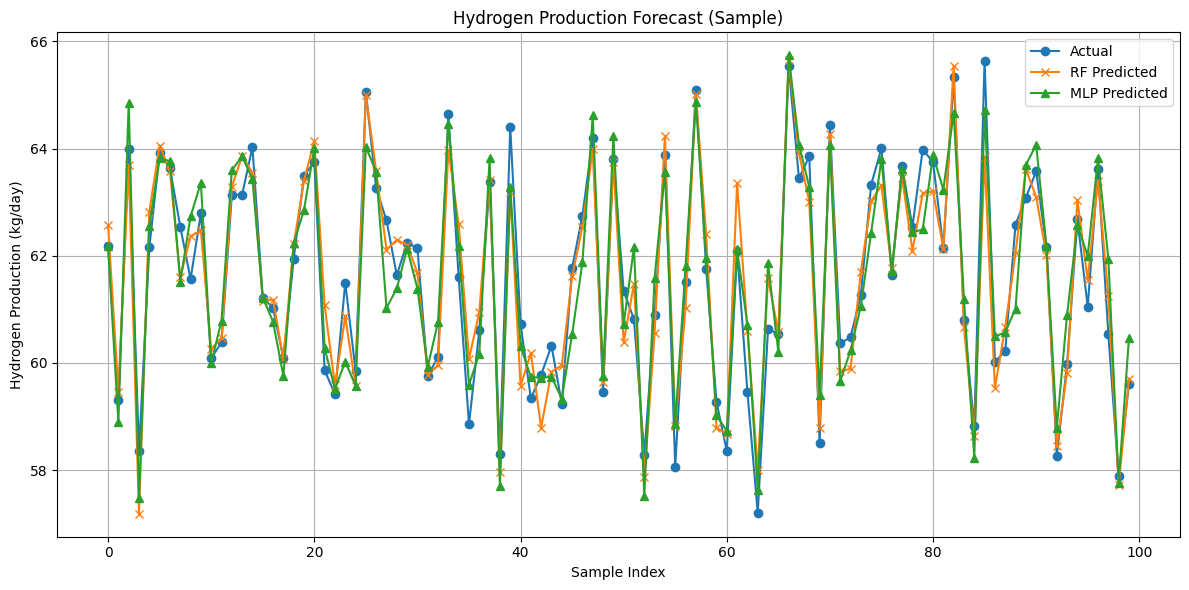

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset manually (user will upload their own file)
file_path = input("Enter the path to your dataset CSV file: ")
df = pd.read_csv(file_path)

# Step 2: Verify required columns are present
required_columns = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio',
    'Daily_Hydrogen_Production'
]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Step 3: Select features and target
selected_features = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio'
]
target = 'Daily_Hydrogen_Production'

X = df[selected_features]
y = df[target]

# Step 4: Normalize features and target
feature_scaler = MinMaxScaler(feature_range=(-10, 10))
target_scaler = MinMaxScaler(feature_range=(56, 67))
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 5: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 6: Train models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Step 7: Evaluation function
def evaluate_model(name, model):
    y_pred_scaled = model.predict(X_test)
    y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test_orig = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mae = mean_absolute_error(y_test_orig, y_pred)
    mse = mean_squared_error(y_test_orig, y_pred)
    r2 = r2_score(y_test_orig, y_pred)
    print(f"{name} Results:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}\n")
    return y_test_orig, y_pred

# Step 8: Evaluate both models
y_test_rf, y_pred_rf = evaluate_model("Random Forest", rf_model)
y_test_mlp, y_pred_mlp = evaluate_model("MLP Regressor", mlp_model)

# Step 9: Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test_rf[:100], label='Actual', marker='o')
plt.plot(y_pred_rf[:100], label='RF Predicted', marker='x')
plt.plot(y_pred_mlp[:100], label='MLP Predicted', marker='^')
plt.title('Hydrogen Production Forecast (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Hydrogen Production (kg/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Q-LEARNING

Starting Q-learning training...
Episode 100/1000 - Total Reward: -3792.91
Episode 200/1000 - Total Reward: -2998.91
Episode 300/1000 - Total Reward: -2369.38
Episode 400/1000 - Total Reward: -2030.40
Episode 500/1000 - Total Reward: -1902.43
Episode 600/1000 - Total Reward: -1802.70
Episode 700/1000 - Total Reward: -1838.30
Episode 800/1000 - Total Reward: -1964.55
Episode 900/1000 - Total Reward: -1815.66
Episode 1000/1000 - Total Reward: -1894.60

Reinforcement Learning (Q-Learning Agent) Results:
MAE: 0.2519
MSE: 0.0843
R² Score: 0.9779



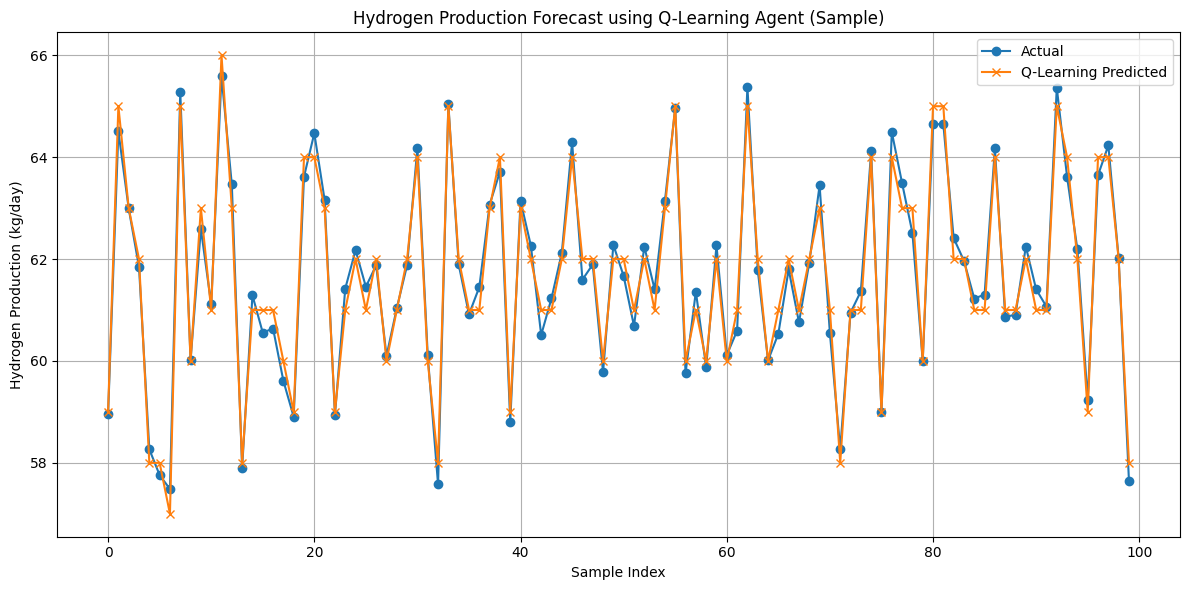

In [ ]:
import pandas as pd
import numpy as np
import gym
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset manually
file_path = input("Enter the path to your dataset CSV file: ")
df = pd.read_csv(file_path)

# Step 2: Verify required columns are present
required_columns = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio',
    'Daily_Hydrogen_Production'
]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Step 3: Select features and target
selected_features = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio'
]
target = 'Daily_Hydrogen_Production'

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# Step 4: Normalize features and target
feature_scaler = MinMaxScaler(feature_range=(-10, 10))
target_scaler = MinMaxScaler(feature_range=(56, 67))
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y).flatten()

# Step 5: Define a Q-learning compatible environment
class HydrogenForecastEnv(gym.Env):
    def __init__(self, X, y):
        super(HydrogenForecastEnv, self).__init__()
        self.X = X
        self.y = y
        self.index = 0
        self.observation_space = gym.spaces.Discrete(len(self.X))
        self.action_space = gym.spaces.Discrete(12)  # Discretized hydrogen predictions: 56 to 67 kg/day
        self.action_values = np.linspace(56, 67, 12)

    def reset(self):
        self.index = 0
        return self.index

    def step(self, action):
        predicted = self.action_values[action]
        true_val = target_scaler.inverse_transform([[self.y[self.index]]])[0][0]
        reward = -abs(predicted - true_val)
        self.index += 1
        done = self.index >= len(self.X)
        next_state = self.index if not done else 0
        return next_state, reward, done, {}

# Step 6: Initialize Q-table
env = HydrogenForecastEnv(X_scaled, y_scaled)
q_table = np.zeros((len(X_scaled), env.action_space.n))

# Step 7: Q-learning parameters
episodes = 1000  # Total training episodes
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Step 8: Q-learning loop
print("Starting Q-learning training...")
for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, env.action_space.n)
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, _ = env.step(action)
        total_reward += reward

        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action] if not done else reward
        td_error = td_target - q_table[state][action]
        q_table[state][action] += alpha * td_error

        state = next_state

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{episodes} - Total Reward: {total_reward:.2f}")

# Step 9: Use Q-table to generate predictions
env_pred = HydrogenForecastEnv(X_scaled, y_scaled)
state = env_pred.reset()
done = False
preds = []
y_actual = []

while not done:
    action = np.argmax(q_table[state])
    true_val = target_scaler.inverse_transform([[env_pred.y[state]]])[0][0]
    y_actual.append(true_val)
    preds.append(env_pred.action_values[action])
    state, _, done, _ = env_pred.step(action)

# Step 10: Evaluation
mae = mean_absolute_error(y_actual, preds)
mse = mean_squared_error(y_actual, preds)
r2 = r2_score(y_actual, preds)
print("\nReinforcement Learning (Q-Learning Agent) Results:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

# Step 11: Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_actual[:100], label='Actual', marker='o')
plt.plot(preds[:100], label='Q-Learning Predicted', marker='x')
plt.title('Hydrogen Production Forecast using Q-Learning Agent (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Hydrogen Production (kg/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


SARSA(RL)

Enter the path to your dataset CSV file: /content/synthetic_green_hydrogen_dataset.zip
Reinforcement Learning (SARSA Agent) Results:
MAE: 4.7082
MSE: 26.0397
R² Score: -5.8237



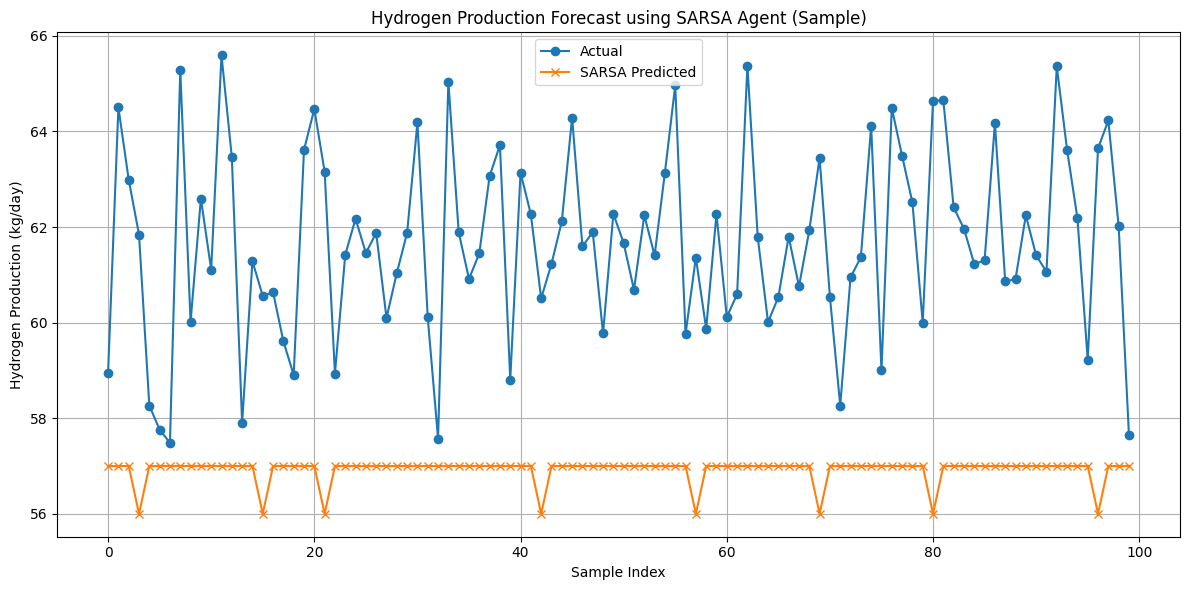

In [ ]:
import pandas as pd
import numpy as np
import gym
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
file_path = input("Enter the path to your dataset CSV file: ")
df = pd.read_csv(file_path)

# Required columns
required_columns = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio',
    'Daily_Hydrogen_Production'
]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Features and target
selected_features = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio'
]
target = 'Daily_Hydrogen_Production'

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# Normalize
feature_scaler = MinMaxScaler(feature_range=(-10, 10))
target_scaler = MinMaxScaler(feature_range=(56, 67))
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y).flatten()

# SARSA-compatible Gym environment
class HydrogenForecastEnv(gym.Env):
    def __init__(self, X, y):
        super(HydrogenForecastEnv, self).__init__()
        self.X = X
        self.y = y
        self.index = 0
        self.observation_space = gym.spaces.Discrete(len(self.X))
        self.action_space = gym.spaces.Discrete(12)  # 56 to 67 kg/day
        self.action_values = np.linspace(56, 67, 12)

    def reset(self):
        self.index = 0
        return self.index

    def step(self, action):
        predicted = self.action_values[action]
        true_val = target_scaler.inverse_transform([[self.y[self.index]]])[0][0]
        reward = -abs(predicted - true_val)
        self.index += 1
        done = self.index >= len(self.X)
        next_state = self.index if not done else 0
        return next_state, reward, done, {}

# Initialize SARSA
env = HydrogenForecastEnv(X_scaled, y_scaled)
q_table = np.zeros((len(X_scaled), env.action_space.n))

# SARSA hyperparameters
episodes = 1
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# SARSA training
for episode in range(episodes):
    state = env.reset()
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(0, env.action_space.n)
    else:
        action = np.argmax(q_table[state])

    done = False
    while not done:
        next_state, reward, done, _ = env.step(action)
        if np.random.uniform(0, 1) < epsilon:
            next_action = np.random.randint(0, env.action_space.n)
        else:
            next_action = np.argmax(q_table[next_state])

        td_target = reward + gamma * q_table[next_state][next_action] if not done else reward
        td_error = td_target - q_table[state][action]
        q_table[state][action] += alpha * td_error

        state = next_state
        action = next_action

# Prediction using SARSA
env_pred = HydrogenForecastEnv(X_scaled, y_scaled)
state = env_pred.reset()
done = False
preds = []
y_actual = []

while not done:
    action = np.argmax(q_table[state])
    true_val = target_scaler.inverse_transform([[env_pred.y[state]]])[0][0]
    y_actual.append(true_val)
    preds.append(env_pred.action_values[action])
    state, _, done, _ = env_pred.step(action)

# Evaluation
mae = mean_absolute_error(y_actual, preds)
mse = mean_squared_error(y_actual, preds)
r2 = r2_score(y_actual, preds)
print("Reinforcement Learning (SARSA Agent) Results:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_actual[:100], label='Actual', marker='o')
plt.plot(preds[:100], label='SARSA Predicted', marker='x')
plt.title('Hydrogen Production Forecast using SARSA Agent (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Hydrogen Production (kg/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

DYNA -Q

In [ ]:
import pandas as pd
import numpy as np
import gym
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
file_path = input("Enter the path to your dataset CSV file: ")
df = pd.read_csv(file_path)

# Required columns
required_columns = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio',
    'Daily_Hydrogen_Production'
]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Features and target
selected_features = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio'
]
target = 'Daily_Hydrogen_Production'

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# Normalize
feature_scaler = MinMaxScaler(feature_range=(-10, 10))
target_scaler = MinMaxScaler(feature_range=(56, 67))
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y).flatten()

# Dyna-Q compatible Gym environment
class HydrogenForecastEnv(gym.Env):
    def __init__(self, X, y):
        super(HydrogenForecastEnv, self).__init__()
        self.X = X
        self.y = y
        self.index = 0
        self.observation_space = gym.spaces.Discrete(len(self.X))
        self.action_space = gym.spaces.Discrete(12)  # 56 to 67 kg/day
        self.action_values = np.linspace(56, 67, 12)

    def reset(self):
        self.index = 0
        return self.index

    def step(self, action):
        predicted = self.action_values[action]
        true_val = target_scaler.inverse_transform([[self.y[self.index]]])[0][0]
        reward = -abs(predicted - true_val)
        self.index += 1
        done = self.index >= len(self.X)
        next_state = self.index if not done else 0
        return next_state, reward, done, {}

# Initialize environment and Q-table
env = HydrogenForecastEnv(X_scaled, y_scaled)
q_table = np.zeros((len(X_scaled), env.action_space.n))
model = {}  # (state, action): (next_state, reward)

# Dyna-Q parameters
episodes = 1
alpha = 0.1
gamma = 0.95
epsilon = 0.1
planning_steps = 10

# Training with Dyna-Q
for episode in range(episodes):
    state = env.reset()
    done = False
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, env.action_space.n)
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, _ = env.step(action)

        # Q-learning update
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action] if not done else reward
        q_table[state][action] += alpha * (td_target - q_table[state][action])

        # Store model
        model[(state, action)] = (next_state, reward)

        # Planning steps
        for _ in range(planning_steps):
            if model:
                s, a = list(model.keys())[np.random.randint(0, len(model))]
                ns, r = model[(s, a)]
                best_na = np.argmax(q_table[ns])
                target = r + gamma * q_table[ns][best_na] if ns < len(X_scaled) else r
                q_table[s][a] += alpha * (target - q_table[s][a])

        state = next_state

# Prediction using Dyna-Q
env_pred = HydrogenForecastEnv(X_scaled, y_scaled)
state = env_pred.reset()
done = False
preds = []
y_actual = []

while not done:
    action = np.argmax(q_table[state])
    true_val = target_scaler.inverse_transform([[env_pred.y[state]]])[0][0]
    y_actual.append(true_val)
    preds.append(env_pred.action_values[action])
    state, _, done, _ = env_pred.step(action)

# Evaluation
mae = mean_absolute_error(y_actual, preds)
mse = mean_squared_error(y_actual, preds)
r2 = r2_score(y_actual, preds)
print("Reinforcement Learning (Dyna-Q Agent) Results:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_actual[:100], label='Actual', marker='o')
plt.plot(preds[:100], label='Dyna-Q Predicted', marker='x')
plt.title('Hydrogen Production Forecast using Dyna-Q Agent (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Hydrogen Production (kg/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install stable_baselines3 gymnasium

A2C(DRL)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 515      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -2.45    |
|    explained_variance | -0.795   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -32.2    |
|    value_loss         | 227      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 511      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -2.44    |
|    explained_variance | -0.217   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -26.3    |
|    value_loss      

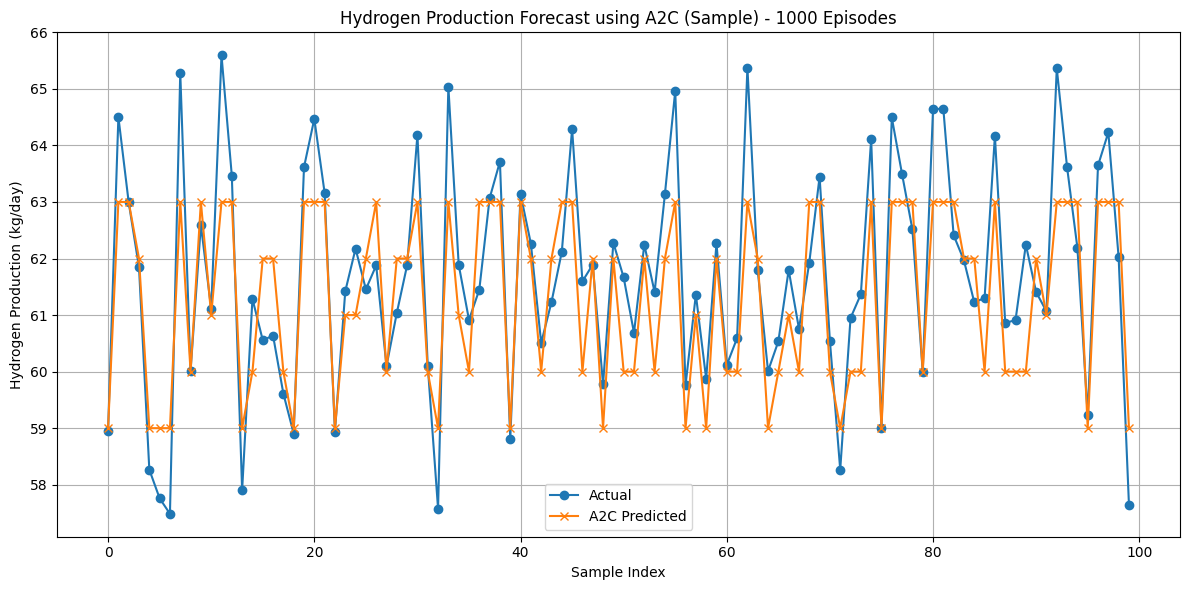

In [ ]:
import pandas as pd
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

# Step 1: Load dataset
file_path = "/content/synthetic_green_hydrogen_dataset.zip"
df = pd.read_csv(file_path)

# Step 2: Ensure required columns are present
required_columns = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio',
    'Daily_Hydrogen_Production'
]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Step 3: Select features and target
selected_features = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio'
]
target = 'Daily_Hydrogen_Production'

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# Step 4: Normalize
feature_scaler = MinMaxScaler(feature_range=(-10, 10))
target_scaler = MinMaxScaler(feature_range=(56, 67))
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y).flatten()

# Step 5: Define Gymnasium environment
class HydrogenForecastEnv(gym.Env):
    def __init__(self, X, y):
        super(HydrogenForecastEnv, self).__init__()
        self.X = X
        self.y = y
        self.index = 0
        self.action_values = np.linspace(56, 67, 12)
        self.observation_space = spaces.Box(low=-10, high=10, shape=(X.shape[1],), dtype=np.float32)
        self.action_space = spaces.Discrete(len(self.action_values))

    def reset(self, seed=None, options=None):
        self.index = 0
        return self.X[self.index], {}

    def step(self, action):
        true_val = target_scaler.inverse_transform([[self.y[self.index]]])[0][0]
        predicted = self.action_values[action]
        reward = -abs(predicted - true_val)
        self.index += 1
        done = self.index >= len(self.X)
        next_obs = self.X[self.index] if not done else np.zeros_like(self.X[0])
        return next_obs, reward, done, False, {}

# Step 6: A2C Training and Evaluation (1000 episodes)
env = DummyVecEnv([lambda: HydrogenForecastEnv(X_scaled, y_scaled)])
model = A2C("MlpPolicy", env, verbose=1)

episodes = 10
model.learn(total_timesteps=len(X_scaled) * episodes)

# Evaluation
env_eval = HydrogenForecastEnv(X_scaled, y_scaled)
obs, _ = env_eval.reset()
done = False
preds_a2c = []
y_actual = []

while not done:
    action, _ = model.predict(obs, deterministic=True)
    true_val = target_scaler.inverse_transform([[env_eval.y[env_eval.index]]])[0][0]
    y_actual.append(true_val)
    preds_a2c.append(env_eval.action_values[action])
    obs, _, done, _, _ = env_eval.step(action)

mae_a2c = mean_absolute_error(y_actual, preds_a2c)
mse_a2c = mean_squared_error(y_actual, preds_a2c)
r2_a2c = r2_score(y_actual, preds_a2c)
print("A2C Results:")
print(f"MAE: {mae_a2c:.4f}")
print(f"MSE: {mse_a2c:.4f}")
print(f"R² Score: {r2_a2c:.4f}\n")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_actual[:100], label='Actual', marker='o')
plt.plot(preds_a2c[:100], label='A2C Predicted', marker='x')
plt.title('Hydrogen Production Forecast using A2C (Sample) - 1000 Episodes')
plt.xlabel('Sample Index')
plt.ylabel('Hydrogen Production (kg/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

PPO(DRL)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 716  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 643         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012030005 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.48       |
|    explained_variance   | -0.0191     |
|    learning_rate        | 0.0003      |
|    loss                 | 1.32e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0296     |
|    value_loss           | 2.99e+03    |
-----------------------------------------
-----------------

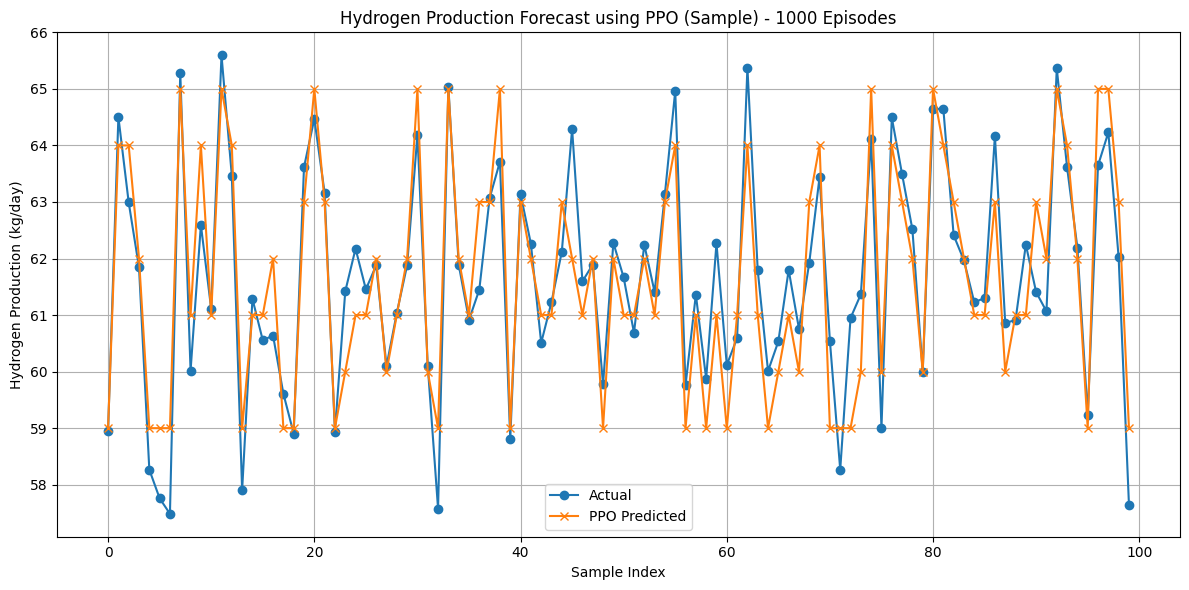

In [ ]:
import pandas as pd
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Step 1: Load dataset
file_path = "/content/synthetic_green_hydrogen_dataset.zip"
df = pd.read_csv(file_path)

# Step 2: Ensure required columns are present
required_columns = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio',
    'Daily_Hydrogen_Production'
]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Step 3: Select features and target
selected_features = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio'
]
target = 'Daily_Hydrogen_Production'

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# Step 4: Normalize
feature_scaler = MinMaxScaler(feature_range=(-10, 10))
target_scaler = MinMaxScaler(feature_range=(56, 67))
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y).flatten()

# Step 5: Define Gymnasium environment
class HydrogenForecastEnv(gym.Env):
    def __init__(self, X, y):
        super(HydrogenForecastEnv, self).__init__()
        self.X = X
        self.y = y
        self.index = 0
        self.action_values = np.linspace(56, 67, 12)
        self.observation_space = spaces.Box(low=-10, high=10, shape=(X.shape[1],), dtype=np.float32)
        self.action_space = spaces.Discrete(len(self.action_values))

    def reset(self, seed=None, options=None):
        self.index = 0
        return self.X[self.index], {}

    def step(self, action):
        true_val = target_scaler.inverse_transform([[self.y[self.index]]])[0][0]
        predicted = self.action_values[action]
        reward = -abs(predicted - true_val)
        self.index += 1
        done = self.index >= len(self.X)
        next_obs = self.X[self.index] if not done else np.zeros_like(self.X[0])
        return next_obs, reward, done, False, {}

# Step 6: PPO Training and Evaluation (1000 episodes)
env = DummyVecEnv([lambda: HydrogenForecastEnv(X_scaled, y_scaled)])
model = PPO("MlpPolicy", env, verbose=1)

episodes = 10
model.learn(total_timesteps=len(X_scaled) * episodes)

# Evaluation
env_eval = HydrogenForecastEnv(X_scaled, y_scaled)
obs, _ = env_eval.reset()
done = False
preds_ppo = []
y_actual = []

while not done:
    action, _ = model.predict(obs, deterministic=True)
    true_val = target_scaler.inverse_transform([[env_eval.y[env_eval.index]]])[0][0]
    y_actual.append(true_val)
    preds_ppo.append(env_eval.action_values[action])
    obs, _, done, _, _ = env_eval.step(action)

mae_ppo = mean_absolute_error(y_actual, preds_ppo)
mse_ppo = mean_squared_error(y_actual, preds_ppo)
r2_ppo = r2_score(y_actual, preds_ppo)
print("PPO Results:")
print(f"MAE: {mae_ppo:.4f}")
print(f"MSE: {mse_ppo:.4f}")
print(f"R² Score: {r2_ppo:.4f}\n")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_actual[:100], label='Actual', marker='o')
plt.plot(preds_ppo[:100], label='PPO Predicted', marker='x')
plt.title('Hydrogen Production Forecast using PPO (Sample) - 1000 Episodes')
plt.xlabel('Sample Index')
plt.ylabel('Hydrogen Production (kg/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

DQN(DRL)

Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 725      |
|    time_elapsed     | 18       |
|    total_timesteps  | 13152    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.143    |
|    n_updates        | 3262     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 711      |
|    time_elapsed     | 36       |
|    total_timesteps  | 26304    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.128    |
|    n_updates        | 6550     |
----------------------------------
DQN Results:
MAE: 0.6032
MSE: 0.5745
R² Score: 0.8495



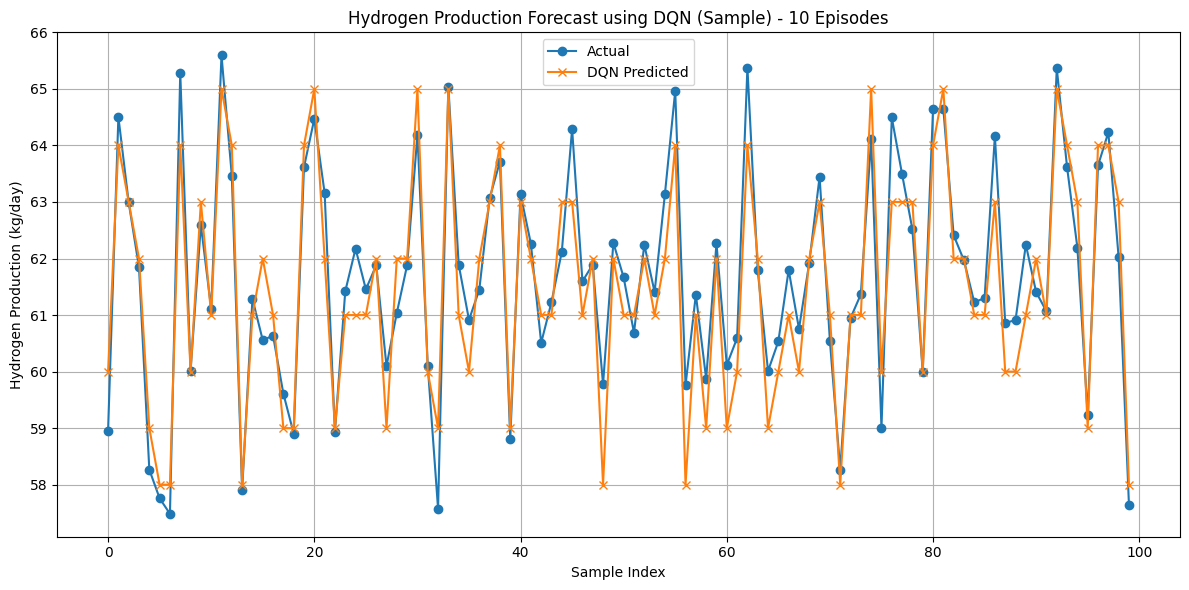

In [ ]:
import pandas as pd
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

# Step 1: Load dataset
file_path = "/content/synthetic_green_hydrogen_dataset.zip"
df = pd.read_csv(file_path)

# Step 2: Ensure required columns are present
required_columns = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio',
    'Daily_Hydrogen_Production'
]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Step 3: Select features and target
selected_features = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio'
]
target = 'Daily_Hydrogen_Production'

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# Step 4: Normalize
feature_scaler = MinMaxScaler(feature_range=(-10, 10))
target_scaler = MinMaxScaler(feature_range=(56, 67))
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y).flatten()

# Step 5: Define Gymnasium environment
class HydrogenForecastEnv(gym.Env):
    def __init__(self, X, y):
        super(HydrogenForecastEnv, self).__init__()
        self.X = X
        self.y = y
        self.index = 0
        self.action_values = np.linspace(56, 67, 12)
        self.observation_space = spaces.Box(low=-10, high=10, shape=(X.shape[1],), dtype=np.float32)
        self.action_space = spaces.Discrete(len(self.action_values))

    def reset(self, seed=None, options=None):
        self.index = 0
        return self.X[self.index], {}

    def step(self, action):
        true_val = target_scaler.inverse_transform([[self.y[self.index]]])[0][0]
        predicted = self.action_values[action]
        reward = -abs(predicted - true_val)
        self.index += 1
        done = self.index >= len(self.X)
        next_obs = self.X[self.index] if not done else np.zeros_like(self.X[0])
        return next_obs, reward, done, False, {}

# Step 6: DQN Training and Evaluation
env = DummyVecEnv([lambda: HydrogenForecastEnv(X_scaled, y_scaled)])
model = DQN("MlpPolicy", env, verbose=1)

episodes = 10
model.learn(total_timesteps=len(X_scaled) * episodes)

# Evaluation
env_eval = HydrogenForecastEnv(X_scaled, y_scaled)
obs, _ = env_eval.reset()
done = False
preds_dqn = []
y_actual = []

while not done:
    action, _ = model.predict(obs, deterministic=True)
    true_val = target_scaler.inverse_transform([[env_eval.y[env_eval.index]]])[0][0]
    y_actual.append(true_val)
    preds_dqn.append(env_eval.action_values[action])
    obs, _, done, _, _ = env_eval.step(action)

mae_dqn = mean_absolute_error(y_actual, preds_dqn)
mse_dqn = mean_squared_error(y_actual, preds_dqn)
r2_dqn = r2_score(y_actual, preds_dqn)
print("DQN Results:")
print(f"MAE: {mae_dqn:.4f}")
print(f"MSE: {mse_dqn:.4f}")
print(f"R² Score: {r2_dqn:.4f}\n")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_actual[:100], label='Actual', marker='o')
plt.plot(preds_dqn[:100], label='DQN Predicted', marker='x')
plt.title('Hydrogen Production Forecast using DQN (Sample) - 10 Episodes')
plt.xlabel('Sample Index')
plt.ylabel('Hydrogen Production (kg/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


SAC DRL

In [ ]:
!pip install stable_baselines3 gymnasium

Using cuda device

Starting SAC training for 10 episodes (Total timesteps: 32880)

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 82       |
|    time_elapsed    | 159      |
|    total_timesteps | 13152    |
| train/             |          |
|    actor_loss      | 56       |
|    critic_loss     | 0.509    |
|    ent_coef        | 0.234    |
|    ent_coef_loss   | 0.0336   |
|    learning_rate   | 0.0003   |
|    n_updates       | 13051    |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 82       |
|    time_elapsed    | 318      |
|    total_timesteps | 26304    |
| train/             |          |
|    actor_loss      | 76.1     |
|    critic_loss     | 0.447    |
|    ent_coef        | 0.242    |
|    ent_coef_loss   | -0.0673  |
|    learning_rate   | 0.0003   |
|    n_updates       | 26203    |

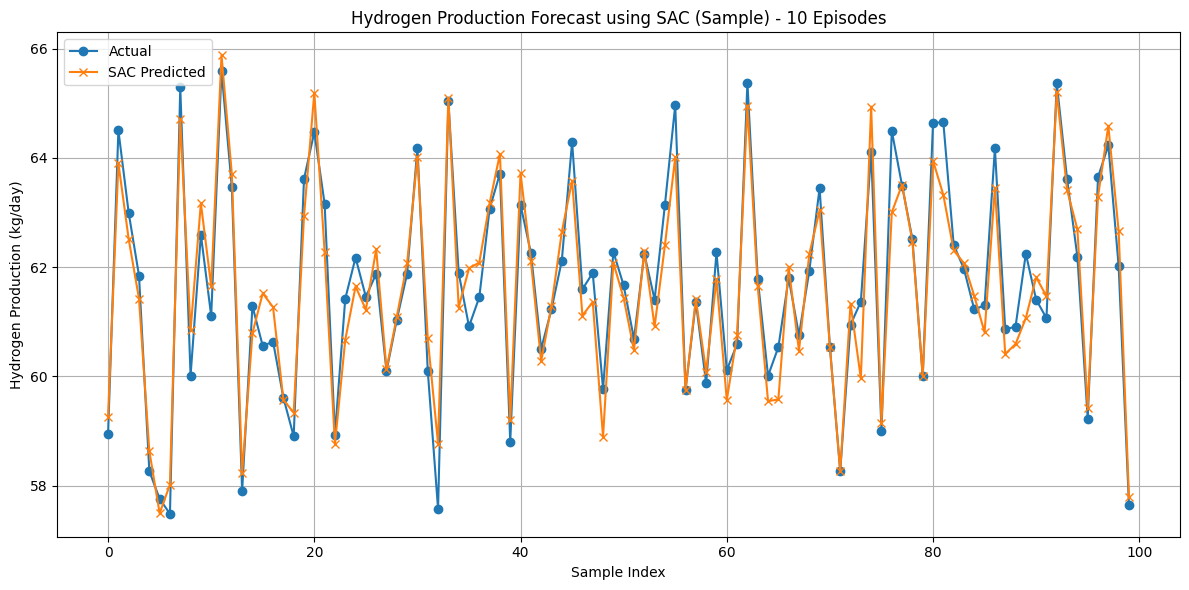

In [ ]:
import pandas as pd
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from stable_baselines3 import SAC
from stable_baselines3.common.vec_env import DummyVecEnv

# Step 1: Load dataset
file_path = "/content/synthetic_green_hydrogen_dataset.zip"
df = pd.read_csv(file_path)

# Step 2: Ensure required columns are present
required_columns = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio',
    'Daily_Hydrogen_Production'
]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Step 3: Select features and target
selected_features = [
    'Solar_Irradiance_Horizontal', 'Ambient_Temperature',
    'Voltage', 'Current', 'Power_Output', 'Performance_Ratio'
]
target = 'Daily_Hydrogen_Production'

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# Step 4: Normalize
feature_scaler = MinMaxScaler(feature_range=(-10, 10))
target_scaler = MinMaxScaler(feature_range=(56, 67))
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y).flatten()

# Step 5: Define Gymnasium environment
class HydrogenForecastEnv(gym.Env):
    def __init__(self, X, y):
        super(HydrogenForecastEnv, self).__init__()
        self.X = X
        self.y = y
        self.index = 0
        self.action_low = 56.0
        self.action_high = 67.0
        self.observation_space = spaces.Box(low=-10, high=10, shape=(X.shape[1],), dtype=np.float32)
        self.action_space = spaces.Box(low=np.array([self.action_low], dtype=np.float32), high=np.array([self.action_high], dtype=np.float32), dtype=np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.index = 0
        return self.X[self.index], {}

    def step(self, action):
        true_val = target_scaler.inverse_transform([[self.y[self.index]]])[0][0]
        predicted = np.clip(action[0], self.action_low, self.action_high)
        reward = -abs(predicted - true_val)
        self.index += 1
        done = self.index >= len(self.X)
        next_obs = self.X[self.index] if not done else np.zeros_like(self.X[0])
        return next_obs, reward, done, False, {}

# Step 6: SAC Training and Evaluation
env = DummyVecEnv([lambda: HydrogenForecastEnv(X_scaled, y_scaled)])
model = SAC("MlpPolicy", env, verbose=1)

episodes = 1000
total_timesteps = len(X_scaled) * episodes
print(f"\nStarting SAC training for {episodes} episodes (Total timesteps: {total_timesteps})\n")
model.learn(total_timesteps=total_timesteps)

# Evaluation
env_eval = HydrogenForecastEnv(X_scaled, y_scaled)
obs, _ = env_eval.reset()
done = False
preds_sac = []
y_actual = []

while not done:
    action, _ = model.predict(obs, deterministic=True)
    true_val = target_scaler.inverse_transform([[env_eval.y[env_eval.index]]])[0][0]
    y_actual.append(true_val)
    preds_sac.append(np.clip(action[0], 56, 67))
    obs, _, done, _, _ = env_eval.step(action)

mae_sac = mean_absolute_error(y_actual, preds_sac)
mse_sac = mean_squared_error(y_actual, preds_sac)
r2_sac = r2_score(y_actual, preds_sac)
print("SAC Results:")
print(f"MAE: {mae_sac:.4f}")
print(f"MSE: {mse_sac:.4f}")
print(f"R² Score: {r2_sac:.4f}\n")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_actual[:100], label='Actual', marker='o')
plt.plot(preds_sac[:100], label='SAC Predicted', marker='x')
plt.title('Hydrogen Production Forecast using SAC (Sample) - 10 Episodes')
plt.xlabel('Sample Index')
plt.ylabel('Hydrogen Production (kg/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Using cuda device

Starting SAC training for 300 episodes (Total timesteps: 109500)

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 50       |
|    time_elapsed    | 28       |
|    total_timesteps | 1460     |
| train/             |          |
|    actor_loss      | 375      |
|    critic_loss     | 124      |
|    ent_coef        | 0.837    |
|    ent_coef_loss   | -0.0115  |
|    learning_rate   | 0.0003   |
|    n_updates       | 1359     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 62       |
|    time_elapsed    | 46       |
|    total_timesteps | 2920     |
| train/             |          |
|    actor_loss      | 732      |
|    critic_loss     | 5.13     |
|    ent_coef        | 0.76     |
|    ent_coef_loss   | -0.0109  |
|    learning_rate   | 0.0003   |
|    n_updates       | 2819    

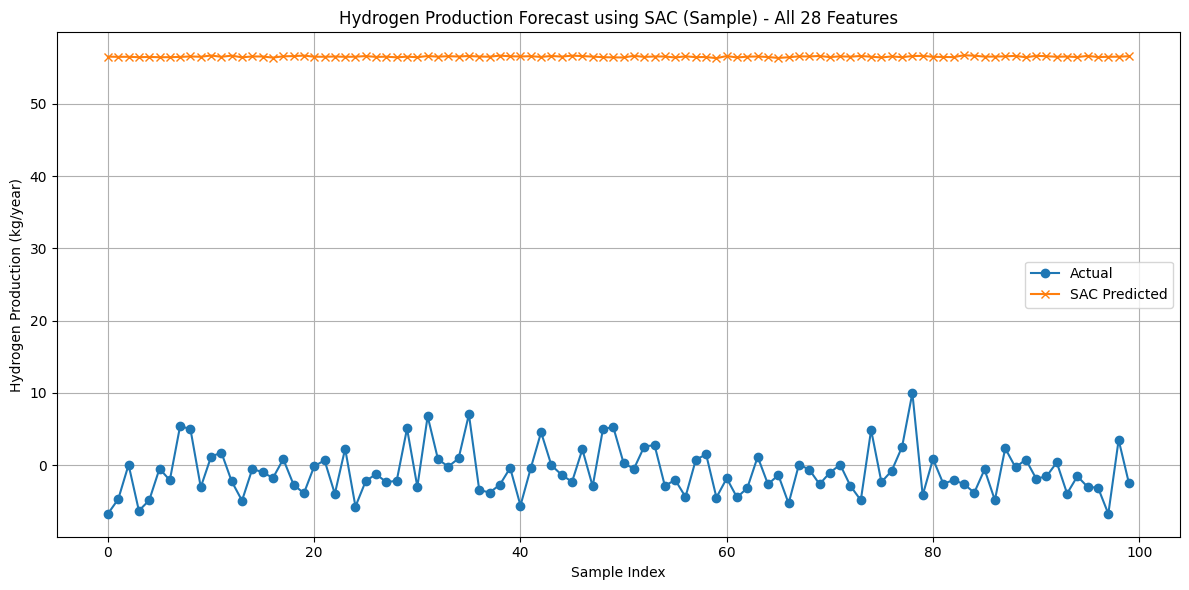

In [ ]:
import pandas as pd
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from stable_baselines3 import SAC
from stable_baselines3.common.vec_env import DummyVecEnv

# Step 1: Load dataset
file_path = "/content/normalized_green_hydrogen_jodhpur_2023.csv"
df = pd.read_csv(file_path)

# Step 2: Select all features and target
selected_features = df.columns.tolist()
# Exclude non-numeric and NaN columns
columns_to_exclude = ['Date', 'Panel_Type', 'Annual_H2_Production', 'Latitude', 'Longitude']
for col in columns_to_exclude:
    if col in selected_features:
        selected_features.remove(col)

target = "Annual_H2_Production"

X = df[selected_features].values
y = df[[target]].values.reshape(-1, 1)

# Step 3: Normalize features and target
feature_scaler = MinMaxScaler(feature_range=(-10, 10))
target_scaler = MinMaxScaler(feature_range=(56, 67))
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y).flatten()

# Step 4: Define continuous Gym environment for SAC
class HydrogenForecastEnv(gym.Env):
    def __init__(self, X, y):
        super(HydrogenForecastEnv, self).__init__()
        self.X = X
        self.y = y
        self.index = 0
        self.action_low = 56.0
        self.action_high = 67.0
        self.observation_space = spaces.Box(low=-10, high=10, shape=(X.shape[1],), dtype=np.float32)
        self.action_space = spaces.Box(low=np.array([self.action_low], dtype=np.float32), high=np.array([self.action_high], dtype=np.float32), dtype=np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.index = 0
        return self.X[self.index], {}

    def step(self, action):
        true_val = target_scaler.inverse_transform([[self.y[self.index]]])[0][0]
        predicted = np.clip(action[0], self.action_low, self.action_high)
        reward = -abs(predicted - true_val)
        self.index += 1
        done = self.index >= len(self.X)
        next_obs = self.X[self.index] if not done else np.zeros_like(self.X[0])
        return next_obs, reward, done, False, {}

# Step 5: SAC Training and Evaluation
env = DummyVecEnv([lambda: HydrogenForecastEnv(X_scaled, y_scaled)])
model = SAC("MlpPolicy", env, verbose=1, learning_rate=3e-4, batch_size=128, train_freq=1, gradient_steps=1)

episodes = 300
total_timesteps = len(X_scaled) * episodes
print(f"\nStarting SAC training for {episodes} episodes (Total timesteps: {total_timesteps})\n")
model.learn(total_timesteps=total_timesteps)

# Step 6: Evaluate the trained model
env_eval = HydrogenForecastEnv(X_scaled, y_scaled)
obs, _ = env_eval.reset()
done = False
preds_sac = []
y_actual = []

while not done:
    action, _ = model.predict(obs, deterministic=True)
    true_val = target_scaler.inverse_transform([[env_eval.y[env_eval.index]]])[0][0]
    y_actual.append(true_val)
    preds_sac.append(np.clip(action[0], 56, 67))
    obs, _, done, _, _ = env_eval.step(action)

# Step 7: Evaluation metrics
mae_sac = mean_absolute_error(y_actual, preds_sac)
mse_sac = mean_squared_error(y_actual, preds_sac)
r2_sac = r2_score(y_actual, preds_sac)
print("\nSAC Results:")
print(f"MAE: {mae_sac:.4f}")
print(f"MSE: {mse_sac:.4f}")
print(f"R² Score: {r2_sac:.4f}\n")

# Step 8: Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_actual[:100], label='Actual', marker='o')
plt.plot(preds_sac[:100], label='SAC Predicted', marker='x')
plt.title('Hydrogen Production Forecast using SAC (Sample) - All 28 Features')
plt.xlabel('Sample Index')
plt.ylabel('Hydrogen Production (kg/year)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()